<a href="https://colab.research.google.com/github/galn14/Big-Data-Analytics_UMKM/blob/main/Big_Data_Analytics_for_Business_UMKM_Analytics_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas matplotlib seaborn statsmodels

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

file_path = '/content/Sorted_Order_Report_by_Date.csv'
data = pd.read_csv(file_path)

data['Tanggal'] = pd.to_datetime(data['Tanggal'], errors='coerce')
data.dropna(subset=['Tanggal'], inplace=True)

# **Revenue**

In [ ]:
# Preprocessing
data['Tanggal'] = pd.to_datetime(data['Tanggal'], errors='coerce')
data.dropna(subset=['Tanggal'], inplace=True)

# Calculate total revenue and total revenue per week
data['Week'] = data['Tanggal'].dt.isocalendar().week
data['Year'] = data['Tanggal'].dt.year

# Total revenue
total_revenue = data['Harga'].sum()

# Revenue per week
weekly_revenue = data.groupby(['Year', 'Week'])['Harga'].sum().reset_index()
weekly_revenue['Tanggal'] = pd.to_datetime(weekly_revenue['Year'].astype(str) + '-' + weekly_revenue['Week'].astype(str) + '-1', errors='coerce', format='%Y-%W-%w')

print(f"Total Revenue: {total_revenue}")
print("Weekly Revenue Analysis")
print(weekly_revenue)

weekly_revenue.head()

Total Revenue: 65204000
Weekly Revenue Analysis
    Year  Week    Harga    Tanggal
0   2024    31  2285000 2024-07-29
1   2024    32  6737000 2024-08-05
2   2024    33  4833000 2024-08-12
3   2024    34  5787000 2024-08-19
4   2024    35  5607000 2024-08-26
5   2024    36  4695000 2024-09-02
6   2024    37  5831000 2024-09-09
7   2024    38  6201000 2024-09-16
8   2024    39  5879000 2024-09-23
9   2024    40  6405000 2024-09-30
10  2024    41  5357000 2024-10-07
11  2024    42  5587000 2024-10-14


,Year,Week,Harga,Tanggal
0,2024,31,2285000,2024-07-29
1,2024,32,6737000,2024-08-05
2,2024,33,4833000,2024-08-12
3,2024,34,5787000,2024-08-19
4,2024,35,5607000,2024-08-26


# **Produk Terlaris Berdasarkan Total Penjualan**

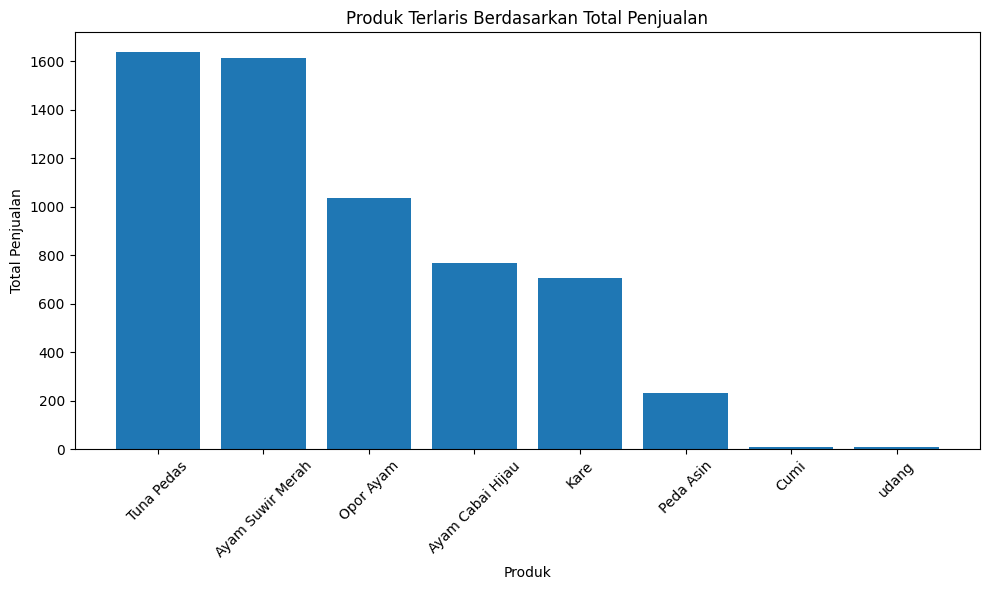

,Product,Total Sales
6,Tuna Pedas,1637
1,Ayam Suwir Merah,1615
4,Opor Ayam,1034
0,Ayam Cabai Hijau,767
3,Kare,704
5,Peda Asin,233
2,Cumi,7
7,udang,7


In [ ]:
# Sum total sales for each product
product_columns = [
    'Ayam Cabai Hijau', 'Ayam Suwir Merah', 'Cumi',
    'Kare', 'Opor Ayam', 'Peda Asin', 'Tuna Pedas', 'udang'
]
product_sales = data[product_columns].sum().reset_index()
product_sales.columns = ['Product', 'Total Sales']

# Sort by Total Sales
product_sales = product_sales.sort_values(by='Total Sales', ascending=False)

import matplotlib.pyplot as plt

# Plot the most popular products
plt.figure(figsize=(10, 6))
plt.bar(product_sales['Product'], product_sales['Total Sales'])
plt.title('Produk Terlaris Berdasarkan Total Penjualan')
plt.xlabel('Produk')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

product_sales

# **Tren Penjualan Harian**

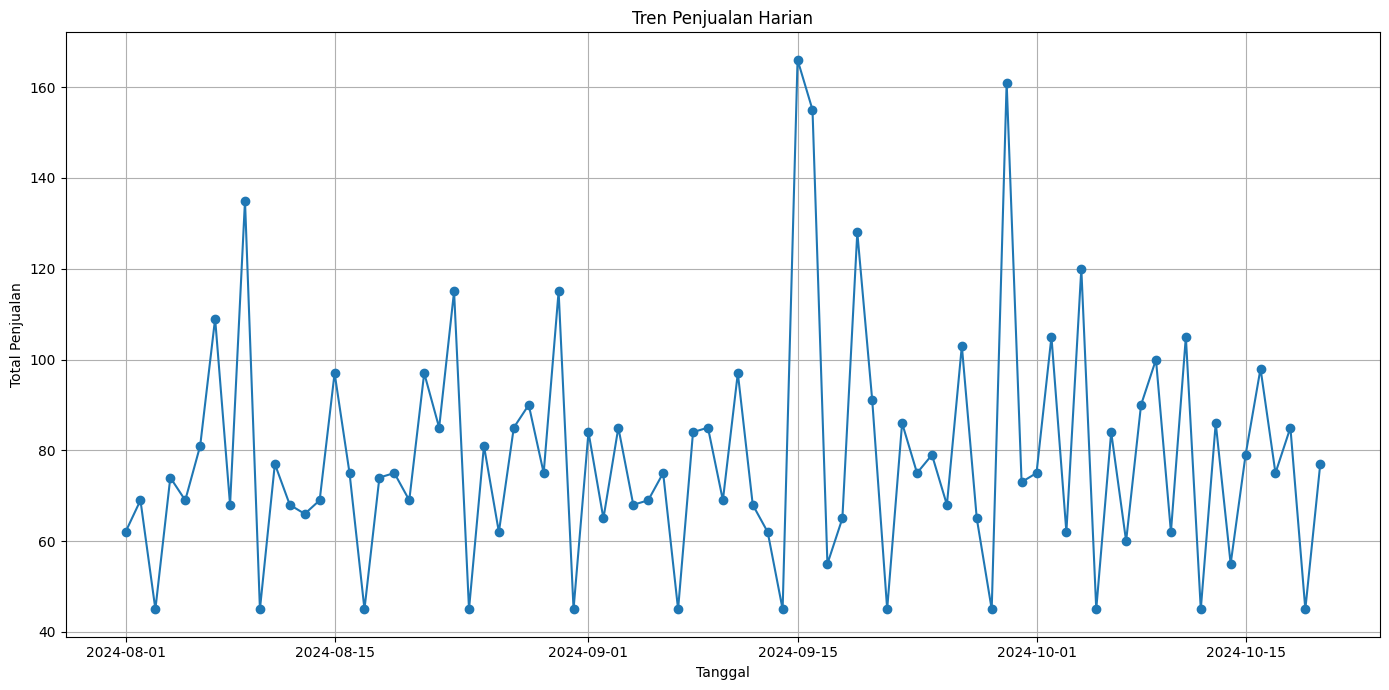

,Tanggal,Total Qty
0,2024-08-01,62
1,2024-08-02,69
2,2024-08-03,45
3,2024-08-04,74
4,2024-08-05,69
...,...,...
76,2024-10-16,98
77,2024-10-17,75
78,2024-10-18,85
79,2024-10-19,45


In [ ]:
# Convert 'Tanggal' to datetime for time-series analysis
data['Tanggal'] = pd.to_datetime(data['Tanggal'], errors='coerce')

# Daily sales trend
daily_sales = data.groupby('Tanggal')['Total Qty'].sum().reset_index()

# Plot daily sales trend
plt.figure(figsize=(14, 7))
plt.plot(daily_sales['Tanggal'], daily_sales['Total Qty'], marker='o', linestyle='-')
plt.title('Tren Penjualan Harian')
plt.xlabel('Tanggal')
plt.ylabel('Total Penjualan')
plt.grid()
plt.tight_layout()
plt.show()

daily_sales

# **Penjualan Produk dari Waktu ke Waktu**

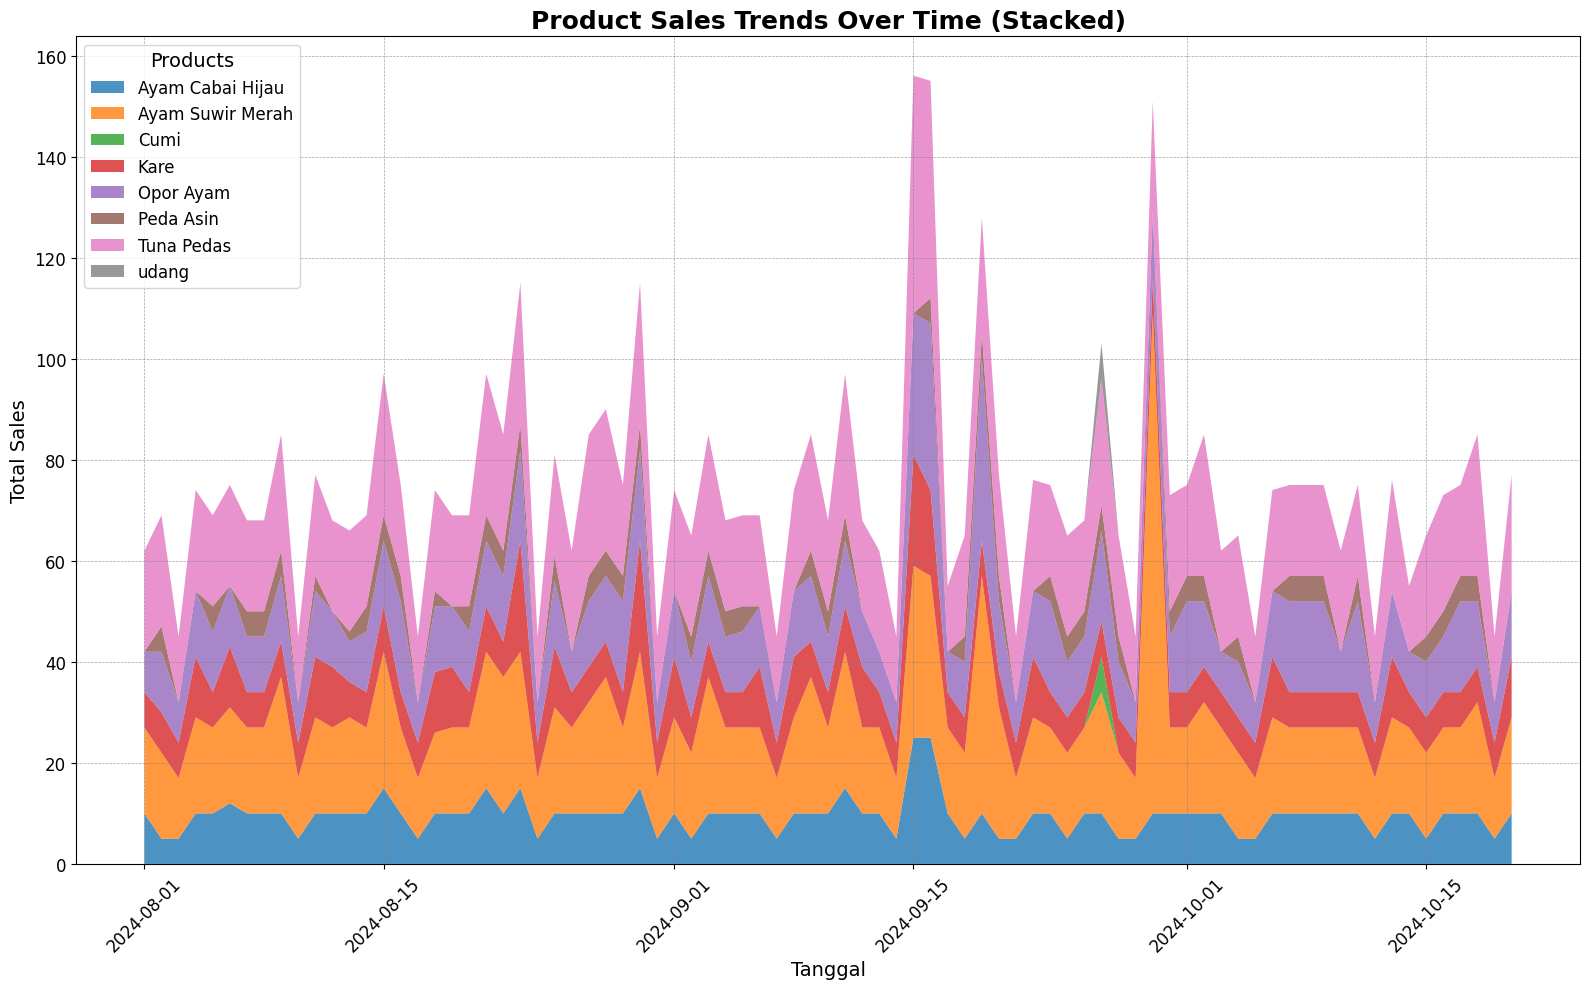

In [ ]:
data['Tanggal'] = pd.to_datetime(data['Tanggal'], errors='coerce')
data.dropna(subset=['Tanggal'], inplace=True)

product_columns = ['Ayam Cabai Hijau', 'Ayam Suwir Merah', 'Cumi', 'Kare', 'Opor Ayam', 'Peda Asin', 'Tuna Pedas', 'udang']

product_sales_trend = data.groupby(['Tanggal'])[product_columns].sum()

plt.figure(figsize=(16, 10))
plt.stackplot(
    product_sales_trend.index,
    [product_sales_trend[column] for column in product_columns],
    labels=product_columns,
    alpha=0.8
)

plt.title('Product Sales Trends Over Time (Stacked)', fontsize=18, fontweight='bold')
plt.xlabel('Tanggal', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Products', fontsize=12, title_fontsize=14, loc='upper left')
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


Analisis ini menunjukkan pola penjualan setiap produk dari **waktu ke waktu**. Produk seperti **Tuna Pedas** dan **Ayam Suwir Merah** menunjukkan penjualan yang stabil dan tinggi, sedangkan produk seperti Cumi dan Udang memiliki penjualan yang sangat rendah.

# **Tren Penjualan Tuna Pedas**

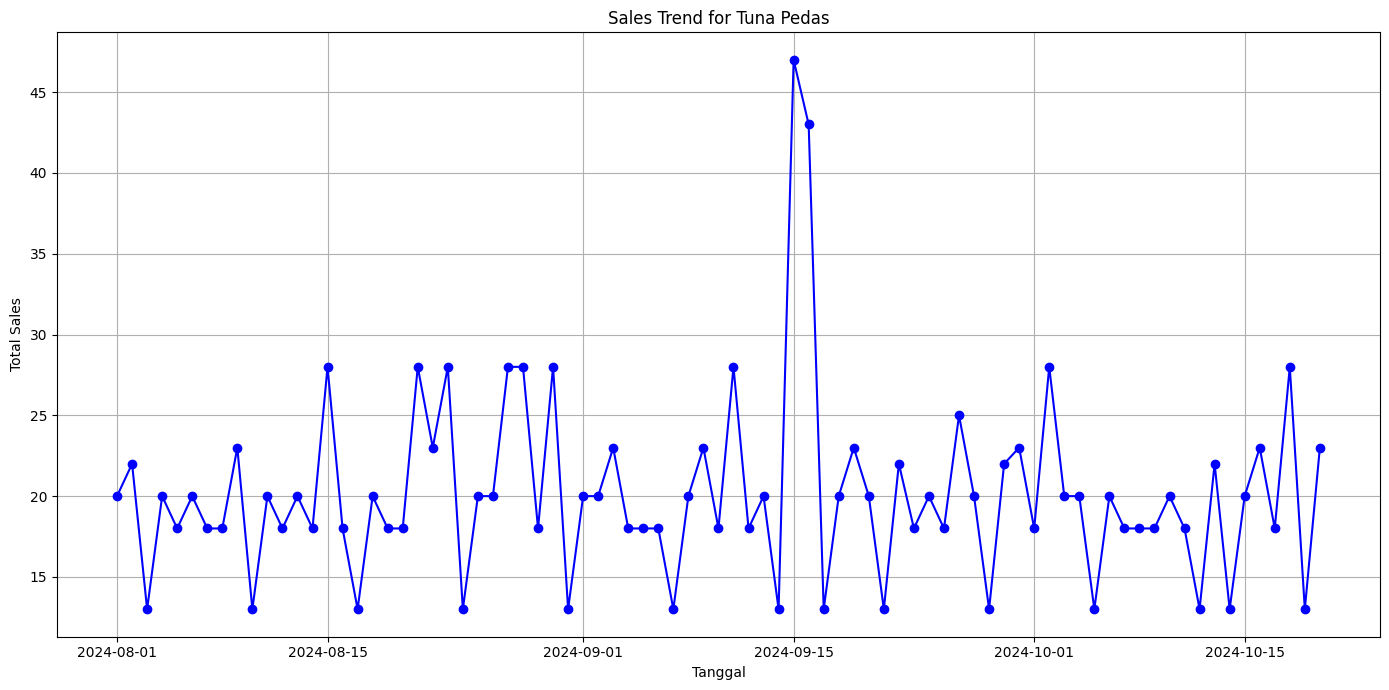

In [ ]:
tuna_pedas_trend = data.groupby('Tanggal')['Tuna Pedas'].sum().reset_index()
tuna_pedas_trend['Day of Week'] = tuna_pedas_trend['Tanggal'].dt.day_name()

plt.figure(figsize=(14, 7))
plt.plot(tuna_pedas_trend['Tanggal'], tuna_pedas_trend['Tuna Pedas'], marker='o', linestyle='-', color='blue')
plt.title('Sales Trend for Tuna Pedas')
plt.xlabel('Tanggal')
plt.ylabel('Total Sales')
plt.grid()
plt.tight_layout()
plt.show()


Penjualan Tuna Pedas relatif konsisten dengan beberapa lonjakan pada hari-hari tertentu. Produk ini adalah kandidat utama untuk promosi karena memiliki permintaan yang stabil.

# **Rata-rata Penjualan Tuna Pedas per-Minggu**

<ipython-input-11-c07d652e8a0e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tuna_pedas_weekly.index, y=tuna_pedas_weekly.values, palette='Blues_d')


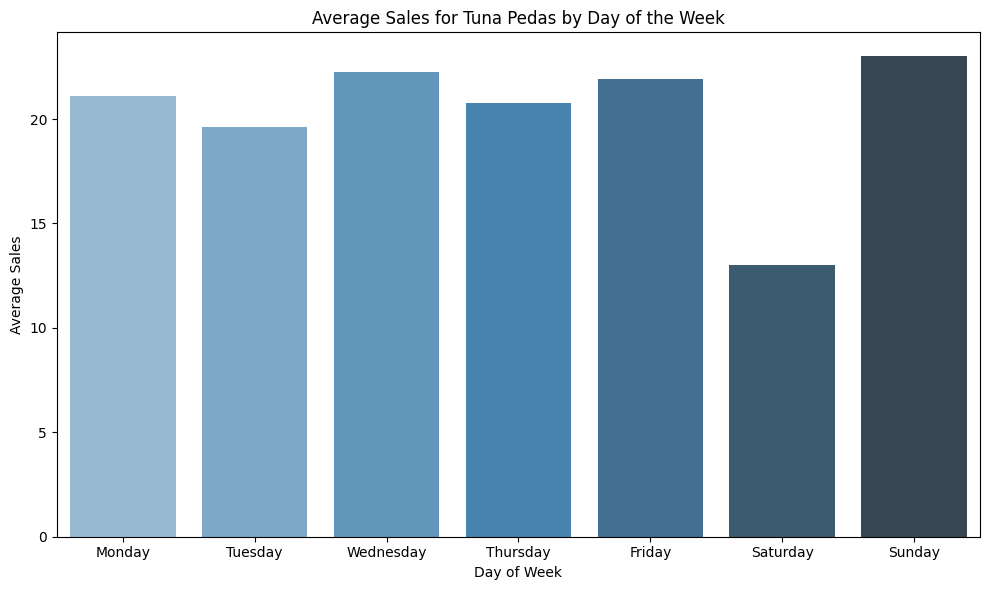

In [ ]:
tuna_pedas_weekly = tuna_pedas_trend.groupby('Day of Week')['Tuna Pedas'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
plt.figure(figsize=(10, 6))
sns.barplot(x=tuna_pedas_weekly.index, y=tuna_pedas_weekly.values, palette='Blues_d')
plt.title('Average Sales for Tuna Pedas by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Sales')
plt.tight_layout()
plt.show()


Penjualan Tuna Pedas tertinggi terjadi pada Minggu (23 unit/hari) dan terendah pada Sabtu (13 unit/hari). Kampanye khusus di akhir pekan dapat meningkatkan penjualan pada hari Sabtu.

# **Peluang penjualan silang**

<ipython-input-12-70e2065ff5bc>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tuna_cross_sales.values, y=tuna_cross_sales.index, palette='Blues_r')


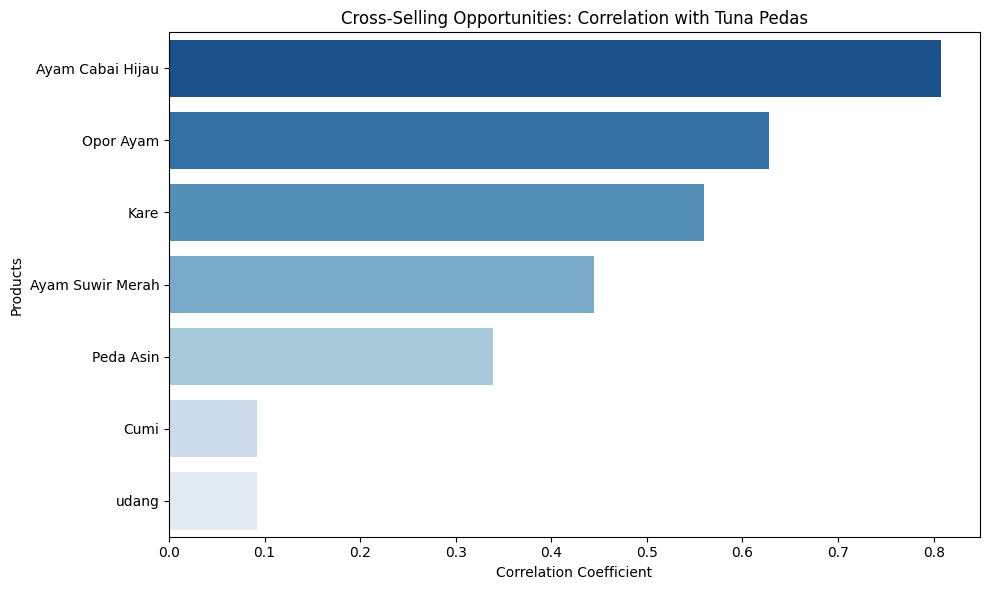

In [ ]:
product_correlation = product_sales_trend.corr()
tuna_cross_sales = product_correlation['Tuna Pedas'].sort_values(ascending=False).drop('Tuna Pedas')

plt.figure(figsize=(10, 6))
sns.barplot(x=tuna_cross_sales.values, y=tuna_cross_sales.index, palette='Blues_r')
plt.title('Cross-Selling Opportunities: Correlation with Tuna Pedas')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Products')
plt.tight_layout()
plt.show()


Produk dengan korelasi tertinggi terhadap Tuna Pedas adalah Ayam Cabai Hijau (0.81) dan Opor Ayam (0.63). Kombinasi produk ini dalam satu paket dapat meningkatkan penjualan.

# **Dampak musiman pada penjualan**




<ipython-input-13-c5ff85477fbb>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_sales = data.groupby('Tanggal')['Total Qty'].sum().asfreq('D').fillna(method='ffill')


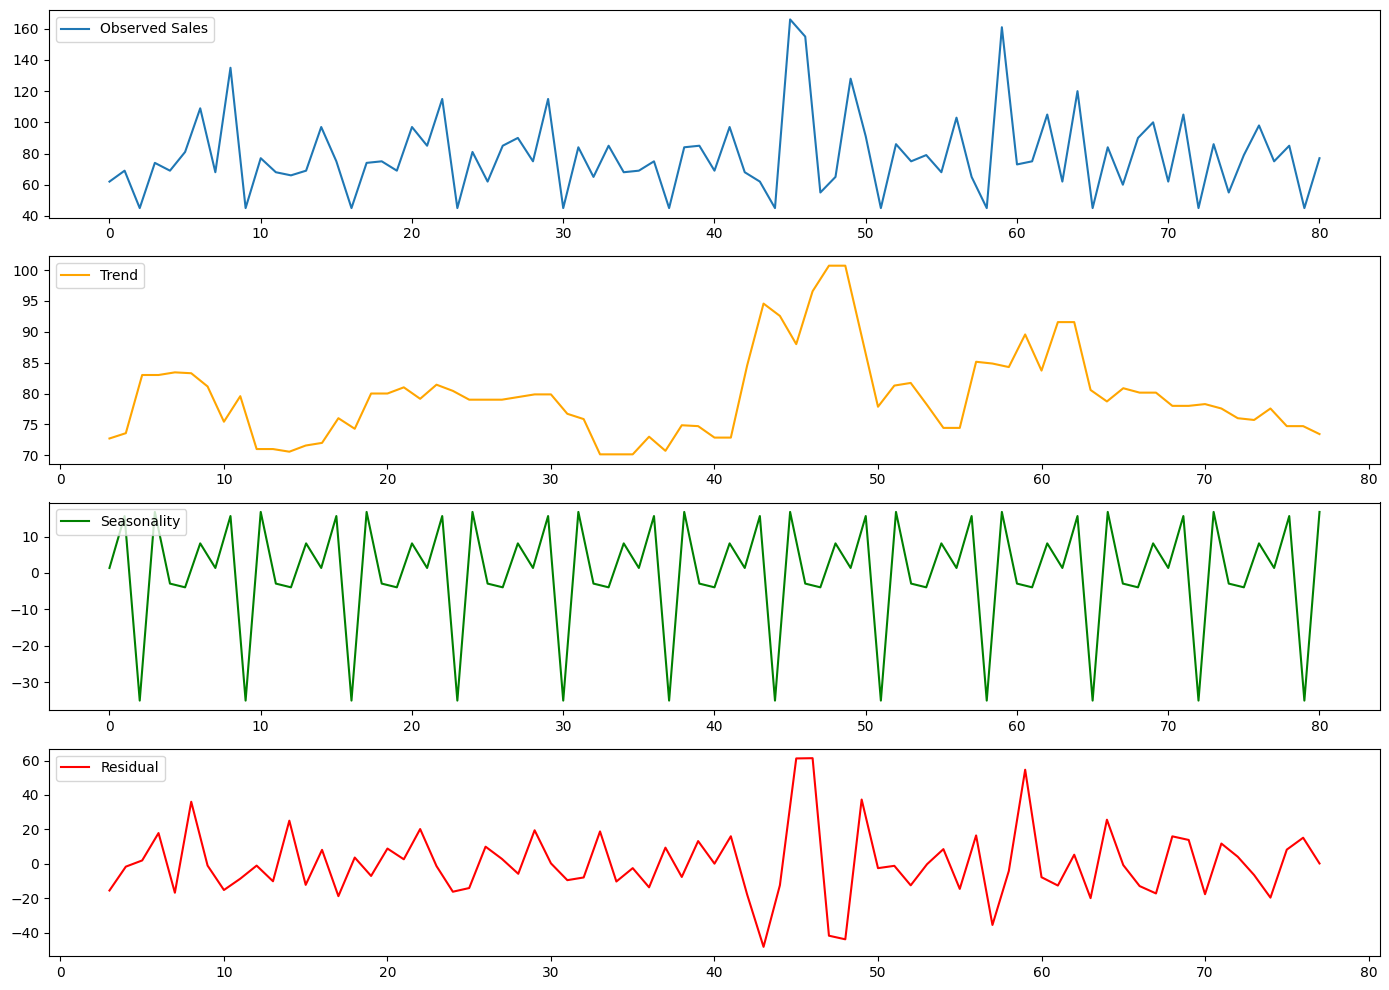

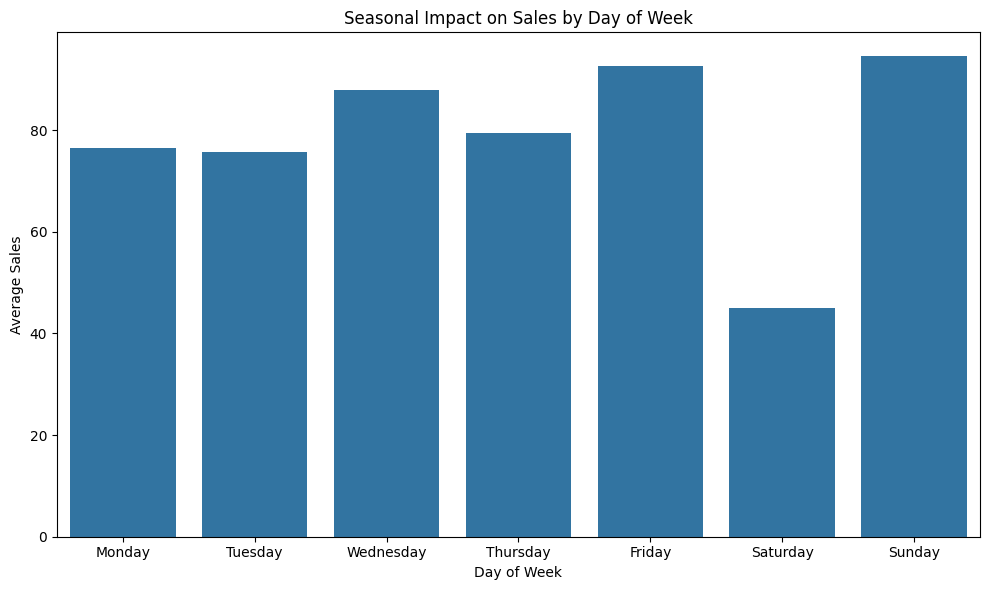

,Total Qty
Day of Week,
Monday,76.545455
Tuesday,75.727273
Wednesday,87.818182
Thursday,79.500000
Friday,92.666667
Saturday,45.000000
Sunday,94.500000


In [ ]:
# Seasonality impact on sales
daily_sales = data.groupby('Tanggal')['Total Qty'].sum().asfreq('D').fillna(method='ffill')
daily_sales = daily_sales.reset_index()

# Seasonal decomposition of sales trends
decomposition = seasonal_decompose(daily_sales['Total Qty'], model='additive', period=7)

# Plot decomposition results
plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed Sales')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual', color='red')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

daily_sales.set_index('Tanggal',inplace=True)
daily_sales['Day of Week'] = daily_sales.index.day_name()
seasonality_impact = daily_sales.groupby('Day of Week')['Total Qty'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

plt.figure(figsize=(10, 6))
sns.barplot(x=seasonality_impact.index, y=seasonality_impact.values)
plt.title('Seasonal Impact on Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Sales')
plt.tight_layout()
plt.show()

seasonality_impact

Analisis menunjukkan pola musiman mingguan, di mana penjualan meningkat pada hari-hari tertentu. Strategi penjadwalan promosi dapat disesuaikan dengan pola ini.

# Ramalan penjualan menggunakan **ARIMA**

<ipython-input-16-afe8f66e2791>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_sales = daily_sales['Total Qty'].asfreq('D').fillna(method='ffill')  # Select only the 'Total Qty' column as a Series


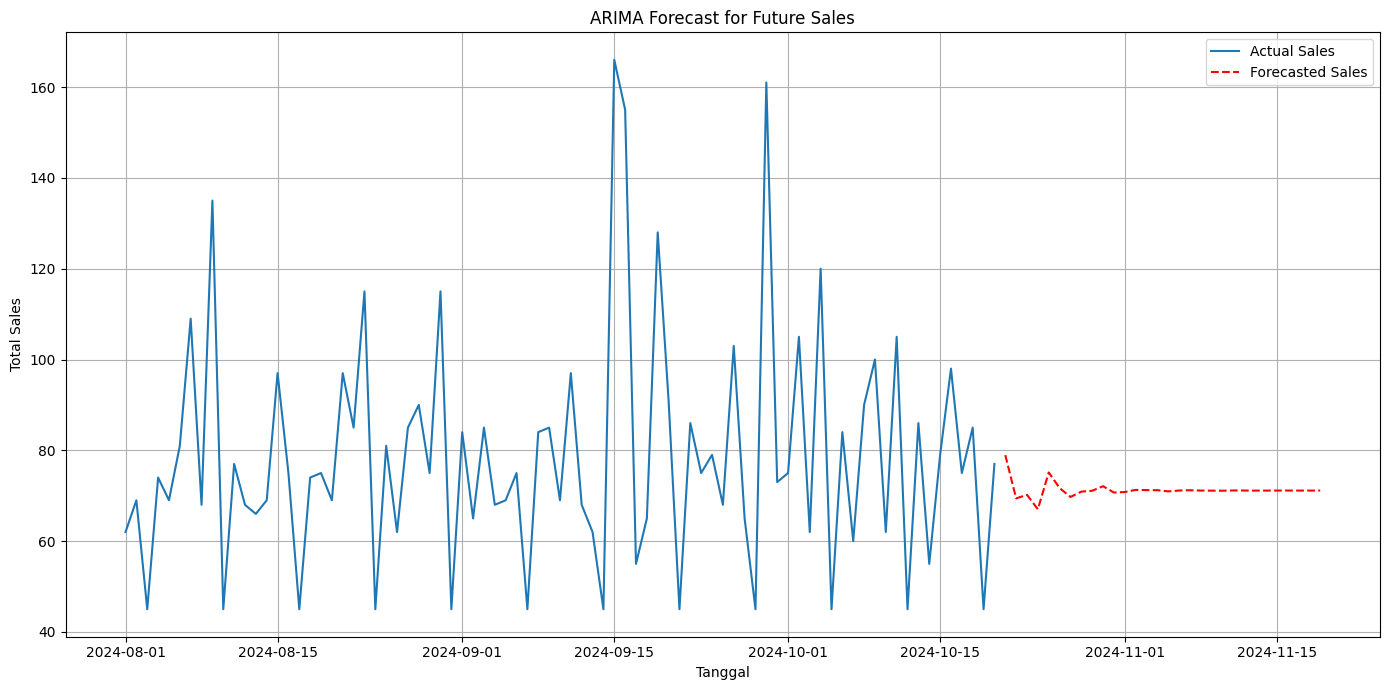

              Tanggal  Forecasted Qty
2024-10-21 2024-10-21       78.948496
2024-10-22 2024-10-22       69.417119
2024-10-23 2024-10-23       70.195177
2024-10-24 2024-10-24       67.026390
2024-10-25 2024-10-25       75.122145
2024-10-26 2024-10-26       71.702261
2024-10-27 2024-10-27       69.729339
2024-10-28 2024-10-28       70.902812
2024-10-29 2024-10-29       71.094213
2024-10-30 2024-10-30       72.099727
2024-10-31 2024-10-31       70.706090
2024-11-01 2024-11-01       70.812672
2024-11-02 2024-11-02       71.286130
2024-11-03 2024-11-03       71.239795
2024-11-04 2024-11-04       71.217717
2024-11-05 2024-11-05       70.954502
2024-11-06 2024-11-06       71.143300
2024-11-07 2024-11-07       71.208271
2024-11-08 2024-11-08       71.136533
2024-11-09 2024-11-09       71.117282
2024-11-10 2024-11-10       71.105113
2024-11-11 2024-11-11       71.160941
2024-11-12 2024-11-12       71.145759
2024-11-13 2024-11-13       71.124555
2024-11-14 2024-11-14       71.130195
2024-11-15 2

In [ ]:
daily_sales = daily_sales['Total Qty'].asfreq('D').fillna(method='ffill')  # Select only the 'Total Qty' column as a Series

# Forecast sales using ARIMA
model = ARIMA(daily_sales, order=(5, 1, 0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=30)
forecast_dates = pd.date_range(daily_sales.index[-1] + pd.Timedelta(days=1), periods=30)

# Plot forecast
forecast_df = pd.DataFrame({'Tanggal': forecast_dates, 'Forecasted Qty': forecast})
plt.figure(figsize=(14, 7))
plt.plot(daily_sales.index, daily_sales, label='Actual Sales')
plt.plot(forecast_df['Tanggal'], forecast_df['Forecasted Qty'], label='Forecasted Sales', linestyle='--', color='red')
plt.title('ARIMA Forecast for Future Sales')
plt.xlabel('Tanggal')
plt.ylabel('Total Sales')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

print(forecast_df)


ARIMA memprediksi bahwa penjualan akan tetap stabil selama 30 hari ke depan dengan rata-rata sekitar 71 unit/hari. Strategi inventaris dapat disesuaikan untuk menghindari kelebihan atau kekurangan stok.

LSTM

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - loss: 0.1595 - val_loss: 0.0274
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0881 - val_loss: 0.0166
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0654 - val_loss: 0.0272
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0758 - val_loss: 0.0175
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0657 - val_loss: 0.0140
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0634 - val_loss: 0.0152
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0730 - val_loss: 0.0153
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0776 - val_loss: 0.0144
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0848 - val_loss: 0.0141
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0576 - val_loss: 0.0145
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0764 - val_loss: 0.0156
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0690 - val_loss: 0.0157
Ep

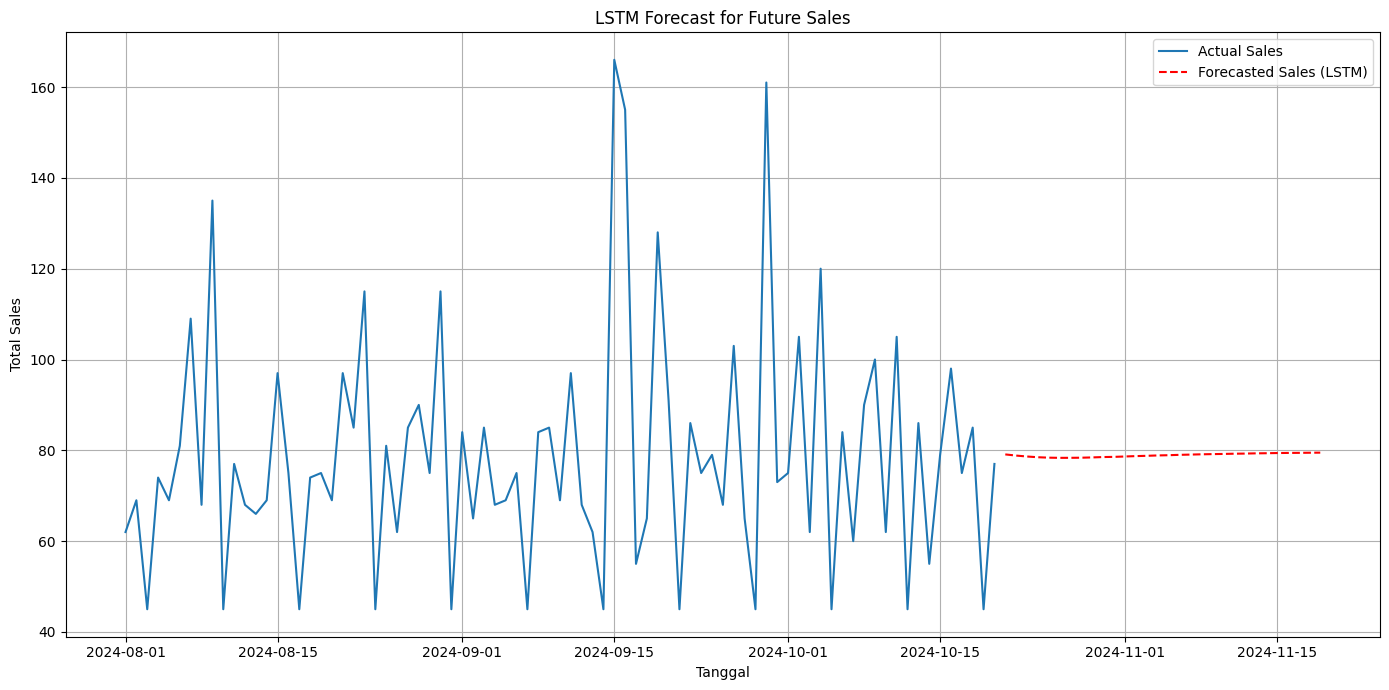

      Tanggal  Forecasted Qty
0  2024-10-21       79.098236
1  2024-10-22       78.841354
2  2024-10-23       78.637695
3  2024-10-24       78.475906
4  2024-10-25       78.382492
5  2024-10-26       78.342262
6  2024-10-27       78.349632
7  2024-10-28       78.373779
8  2024-10-29       78.436256
9  2024-10-30       78.517670
10 2024-10-31       78.556931
11 2024-11-01       78.641724
12 2024-11-02       78.723289
13 2024-11-03       78.789139
14 2024-11-04       78.870239
15 2024-11-05       78.921394
16 2024-11-06       79.001381
17 2024-11-07       79.057320
18 2024-11-08       79.118813
19 2024-11-09       79.162575
20 2024-11-10       79.199844
21 2024-11-11       79.250572
22 2024-11-12       79.278961
23 2024-11-13       79.330399
24 2024-11-14       79.359360
25 2024-11-15       79.398857
26 2024-11-16       79.424622
27 2024-11-17       79.441345
28 2024-11-18       79.467285
29 2024-11-19       79.487015


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

daily_sales = daily_sales.reset_index()
daily_sales['Tanggal'] = pd.to_datetime(daily_sales['Tanggal'])
daily_sales.set_index('Tanggal', inplace=True)

# Normalisasi data sales
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(daily_sales[['Total Qty']])

# Membuat sequence untuk LSTM (look-back period of 30 days)
look_back = 30
X, y = [], []
for i in range(look_back, len(scaled_data)):
    X.append(scaled_data[i-look_back:i, 0])  # 30 hari data sebelumnya
    y.append(scaled_data[i, 0])  # Target: penjualan hari berikutnya

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # Reshape untuk input LSTM

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membangun model LSTM
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(units=50, return_sequences=False),
    Dense(units=25),
    Dense(units=1)  # Output layer
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Training model
model.fit(X_train, y_train, batch_size=16, epochs=20, validation_data=(X_test, y_test))

# Prediksi 30 hari ke depan
future_steps = 30
predictions = []
last_sequence = X[-1]  # Mengambil sequence terakhir dari data

for _ in range(future_steps):
    pred = model.predict(last_sequence.reshape(1, look_back, 1))
    predictions.append(pred[0, 0])
    last_sequence = np.roll(last_sequence, -1)  # Geser sequence ke kiri
    last_sequence[-1] = pred  # Tambahkan prediksi ke sequence

# Inverse scaling data prediksi
predicted_sales = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Menyiapkan data untuk plotting
forecast_dates = pd.date_range(daily_sales.index[-1] + pd.Timedelta(days=1), periods=future_steps)
forecast_df = pd.DataFrame({'Tanggal': forecast_dates, 'Forecasted Qty': predicted_sales.flatten()})

# Visualisasi prediksi
plt.figure(figsize=(14, 7))
plt.plot(daily_sales.index, daily_sales['Total Qty'], label='Actual Sales')
plt.plot(forecast_df['Tanggal'], forecast_df['Forecasted Qty'], label='Forecasted Sales (LSTM)', linestyle='--', color='red')
plt.title('LSTM Forecast for Future Sales')
plt.xlabel('Tanggal')
plt.ylabel('Total Sales')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


print(forecast_df)



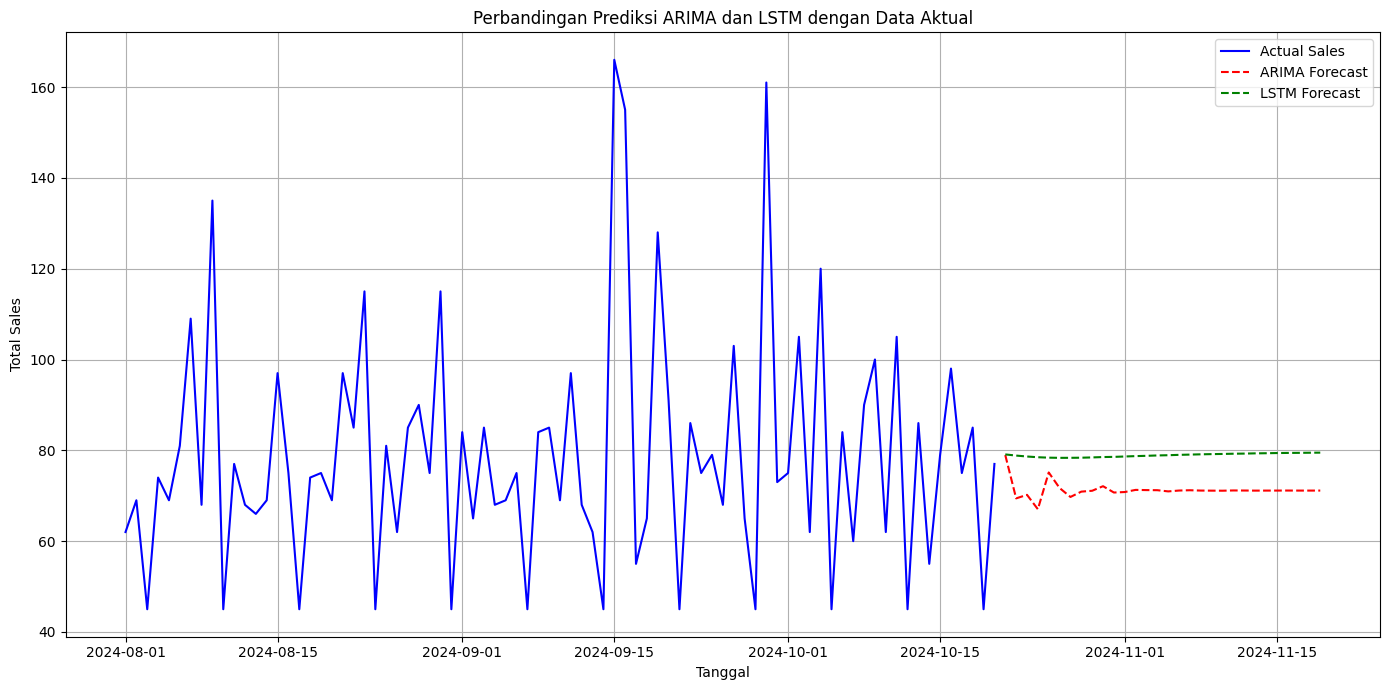

In [ ]:
import matplotlib.pyplot as plt

# Prediksi ARIMA
arima_forecast = forecast  # Pastikan sudah ada dari model ARIMA

# Prediksi LSTM
lstm_forecast = predicted_sales.flatten()  # Hasil dari model LSTM

# Plot hasil perbandingan
plt.figure(figsize=(14, 7))

# Plot data aktual
plt.plot(daily_sales.index, daily_sales['Total Qty'], label='Actual Sales', color='blue')

# Plot prediksi ARIMA
plt.plot(forecast_df['Tanggal'], forecast_df['Forecasted Qty'], label='ARIMA Forecast', linestyle='--', color='red')

# Plot prediksi LSTM
plt.plot(forecast_df['Tanggal'], lstm_forecast, label='LSTM Forecast', linestyle='--', color='green')

# Tambahkan elemen plot lainnya
plt.title('Perbandingan Prediksi ARIMA dan LSTM dengan Data Aktual')
plt.xlabel('Tanggal')
plt.ylabel('Total Sales')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


<ipython-input-20-06db2d2f5a0c>:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_sales = daily_sales['Total Qty'].asfreq('D').fillna(method='ffill')


Evaluasi Model
ARIMA - MAE: 20.21, MSE: 710.85, RMSE: 26.66, MAPE: nan%
LSTM  - MAE: 18.90, MSE: 640.63, RMSE: 25.31, MAPE: 27.06%


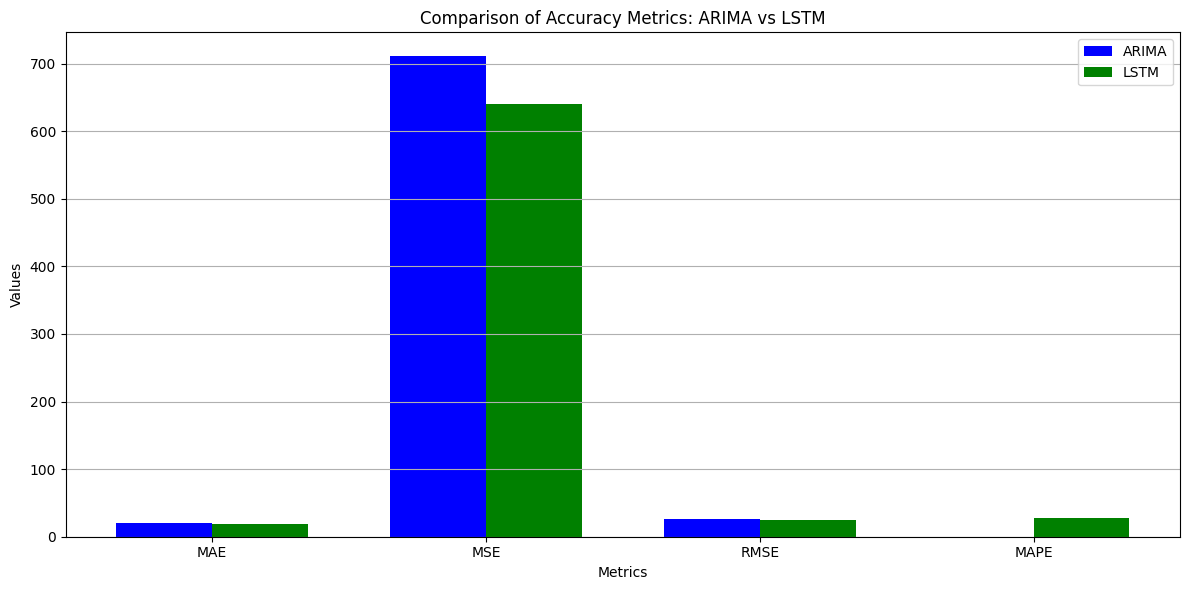

In [ ]:
# Cell 7

from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose


# Define forecast here, or make sure the cell where it's defined is run before this one
# Forecast sales using ARIMA
daily_sales = daily_sales.reset_index()
daily_sales['Tanggal'] = pd.to_datetime(daily_sales['Tanggal'])
daily_sales.set_index('Tanggal', inplace=True)
daily_sales = daily_sales['Total Qty'].asfreq('D').fillna(method='ffill')
#daily_sales = daily_sales.reset_index() #This will reset the index to default numeric and move Tanggal and Total Qty to data columns.

model = ARIMA(daily_sales, order=(5, 1, 0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=30)
forecast_dates = pd.date_range(daily_sales.index[-1] + pd.Timedelta(days=1), periods=30)


# Membandingkan Prediksi ARIMA
actual_values = daily_sales[-30:]  # Nilai aktual (30 hari terakhir sebelum prediksi)
arima_forecast = forecast  # Prediksi ARIMA

# Membandingkan Prediksi LSTM
lstm_forecast = predicted_sales.flatten()  # Prediksi LSTM

# MAE
mae_arima = mean_absolute_error(actual_values, arima_forecast)
mae_lstm = mean_absolute_error(actual_values, lstm_forecast)

# MSE
mse_arima = mean_squared_error(actual_values, arima_forecast)
mse_lstm = mean_squared_error(actual_values, lstm_forecast)

# RMSE
rmse_arima = mse_arima ** 0.5
rmse_lstm = mse_lstm ** 0.5

# MAPE
mape_arima = np.mean(np.abs((actual_values - arima_forecast) / actual_values)) * 100
mape_lstm = np.mean(np.abs((actual_values - lstm_forecast) / actual_values)) * 100

# Output hasil
print("Evaluasi Model")
print("==============")
print(f"ARIMA - MAE: {mae_arima:.2f}, MSE: {mse_arima:.2f}, RMSE: {rmse_arima:.2f}, MAPE: {mape_arima:.2f}%")
print(f"LSTM  - MAE: {mae_lstm:.2f}, MSE: {mse_lstm:.2f}, RMSE: {rmse_lstm:.2f}, MAPE: {mape_lstm:.2f}%")


# Data metrik untuk perbandingan
metrics = ['MAE', 'MSE', 'RMSE', 'MAPE']
arima_metrics = [mae_arima, mse_arima, rmse_arima, mape_arima]
lstm_metrics = [mae_lstm, mse_lstm, rmse_lstm, mape_lstm]

# Visualisasi perbandingan metrik
x = np.arange(len(metrics))  # Label untuk x-axis
width = 0.35  # Lebar bar

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, arima_metrics, width, label='ARIMA', color='blue')
plt.bar(x + width/2, lstm_metrics, width, label='LSTM', color='green')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Comparison of Accuracy Metrics: ARIMA vs LSTM')
plt.xticks(x, metrics)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# **Ringkasan Segmentasi Pelanggan dengan Clustering**

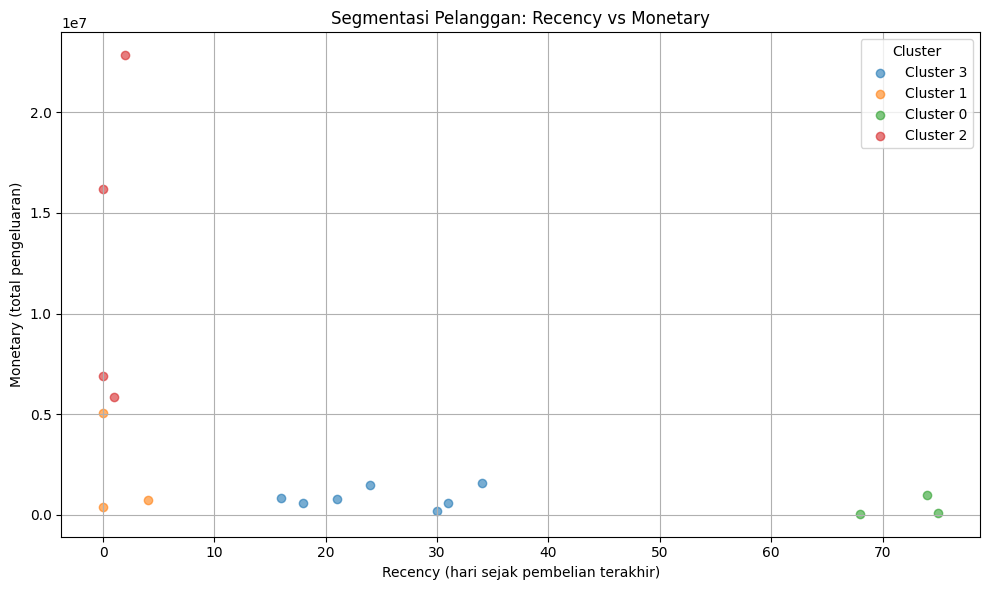

Ringkasan Segmentasi Pelanggan:
           Recency  Frequency      Monetary  Customer Count
Cluster                                                    
0        72.333333   1.000000  3.746667e+05               3
1         1.333333   8.333333  2.072667e+06               3
2         0.750000  72.000000  1.294450e+07               4
3        24.857143   1.428571  8.691429e+05               7


,Recency,Frequency,Monetary,Customer Count
Cluster,,,,
0,72.333333,1.000000,3.746667e+05,3
1,1.333333,8.333333,2.072667e+06,3
2,0.750000,72.000000,1.294450e+07,4
3,24.857143,1.428571,8.691429e+05,7


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Menghitung nilai RFM untuk setiap pelanggan
rfm_data = data.groupby('Nama').agg({
    'Tanggal': lambda x: (data['Tanggal'].max() - x.max()).days,  # Recency: Hari sejak pembelian terakhir
    'Pesanan': 'count',                                          # Frequency: Jumlah pesanan
    'Harga': 'sum'                                               # Monetary: Total pengeluaran
}).reset_index()

rfm_data.columns = ['Nama', 'Recency', 'Frequency', 'Monetary']

# Normalisasi data RFM
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data[['Recency', 'Frequency', 'Monetary']])

# Clustering menggunakan K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_data['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Ringkasan cluster
cluster_summary = rfm_data.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'Nama': 'count'
}).rename(columns={'Nama': 'Customer Count'})

# Visualisasi cluster
plt.figure(figsize=(10, 6))
for cluster in rfm_data['Cluster'].unique():
    cluster_data = rfm_data[rfm_data['Cluster'] == cluster]
    plt.scatter(cluster_data['Recency'], cluster_data['Monetary'], label=f'Cluster {cluster}', alpha=0.6)
plt.title('Segmentasi Pelanggan: Recency vs Monetary')
plt.xlabel('Recency (hari sejak pembelian terakhir)')
plt.ylabel('Monetary (total pengeluaran)')
plt.legend(title='Cluster')
plt.grid()
plt.tight_layout()
plt.show()

# Menampilkan ringkasan cluster
print("Ringkasan Segmentasi Pelanggan:")
print(cluster_summary)

cluster_summary


---
* **Recency**: Mengukur waktu sejak pembelian terakhir pelanggan.
* **Frequency**: Menghitung jumlah pesanan pelanggan.
---
* **Monetary**: Total pengeluaran pelanggan.
Pelanggan dikelompokkan ke dalam 4 cluster berdasarkan perilaku mereka:

* **Cluster 0**: Pelanggan dorman dengan pembelian jarang dan pengeluaran sedang.
* **Cluster 1**: Pelanggan baru yang cukup sering berbelanja dengan pengeluaran besar.
* **Cluster 2**: Pelanggan bernilai tinggi, sangat aktif, sering berbelanja, dan baru-baru ini.
* **Cluster 3**: Pelanggan dengan aktivitas moderat, jarang berbelanja, dan pengeluaran sedang.




# **Segmentasi Ringkasan Berdasarkan Lokasi dengan Clustering**

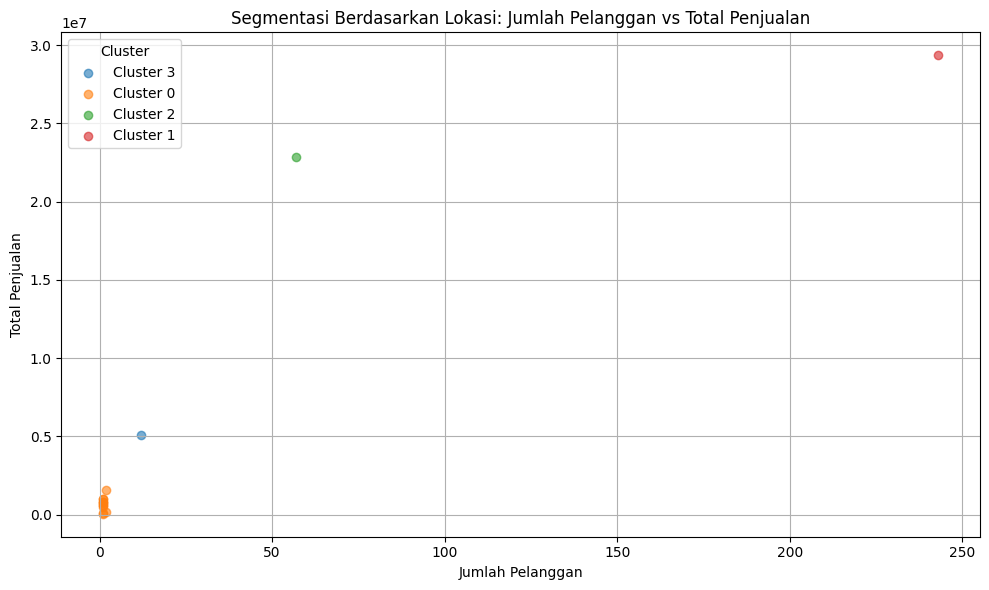

Ringkasan Segmentasi Berdasarkan Lokasi:
         Customer Count  Total Quantity   Total Sales  Location Count
Cluster                                                              
0              1.166667       44.333333  6.631667e+05              12
1            243.000000     3573.000000  2.935800e+07               1
2             57.000000     1770.000000  2.282800e+07               1
3             12.000000      506.000000  5.060000e+06               1


,Customer Count,Total Quantity,Total Sales,Location Count
Cluster,,,,
0,1.166667,44.333333,6.631667e+05,12
1,243.000000,3573.000000,2.935800e+07,1
2,57.000000,1770.000000,2.282800e+07,1
3,12.000000,506.000000,5.060000e+06,1


In [ ]:
# Analisis demografi berdasarkan lokasi
geo_data = data.groupby('Alamat').agg({
    'Nama': 'count',          # Jumlah pelanggan per lokasi
    'Total Qty': 'sum',       # Total kuantitas produk yang dibeli
    'Harga': 'sum'            # Total pengeluaran per lokasi
}).reset_index()

geo_data.columns = ['Location', 'Customer Count', 'Total Quantity', 'Total Sales']

# Normalisasi data lokasi
scaler = StandardScaler()
geo_scaled = scaler.fit_transform(geo_data[['Customer Count', 'Total Quantity', 'Total Sales']])

# Clustering menggunakan K-Means
kmeans_geo = KMeans(n_clusters=4, random_state=42)
geo_data['Cluster'] = kmeans_geo.fit_predict(geo_scaled)

# Ringkasan cluster berdasarkan lokasi
geo_cluster_summary = geo_data.groupby('Cluster').agg({
    'Customer Count': 'mean',
    'Total Quantity': 'mean',
    'Total Sales': 'mean',
    'Location': 'count'
}).rename(columns={'Location': 'Location Count'})

# Visualisasi cluster lokasi
plt.figure(figsize=(10, 6))
for cluster in geo_data['Cluster'].unique():
    cluster_data = geo_data[geo_data['Cluster'] == cluster]
    plt.scatter(cluster_data['Customer Count'], cluster_data['Total Sales'], label=f'Cluster {cluster}', alpha=0.6)
plt.title('Segmentasi Berdasarkan Lokasi: Jumlah Pelanggan vs Total Penjualan')
plt.xlabel('Jumlah Pelanggan')
plt.ylabel('Total Penjualan')
plt.legend(title='Cluster')
plt.grid()
plt.tight_layout()
plt.show()

# Menampilkan ringkasan cluster
print("Ringkasan Segmentasi Berdasarkan Lokasi:")
print(geo_cluster_summary)
geo_cluster_summary



* **Lokasi Berperforma Tinggi:**
Cluster dengan jumlah pelanggan dan total penjualan tinggi dapat diidentifikasi sebagai pasar utama.
* **Optimisasi Strategi:**
Fokus pemasaran pada lokasi dengan penjualan tinggi, dan strategi khusus untuk meningkatkan kinerja di lokasi dengan potensi rendah.

# **Rincian Klaster Pelanggan RFM**

In [ ]:
data['Tanggal'] = pd.to_datetime(data['Tanggal'], errors='coerce')
data.dropna(subset=['Tanggal'], inplace=True)

# Perform RFM analysis
rfm_data = data.groupby('Nama').agg({
    'Tanggal': lambda x: (data['Tanggal'].max() - x.max()).days,  # Recency
    'Pesanan': 'count',                                          # Frequency
    'Harga': 'sum'                                               # Monetary
}).reset_index()

rfm_data.columns = ['Nama', 'Recency', 'Frequency', 'Monetary']

# Normalize the RFM values and apply K-Means
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data[['Recency', 'Frequency', 'Monetary']])

kmeans = KMeans(n_clusters=4, random_state=42)
rfm_data['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Geographic segmentation
geo_data = data.groupby('Alamat').agg({
    'Nama': 'count',          # Number of customers per location
    'Total Qty': 'sum',       # Total items purchased per location
    'Harga': 'sum'            # Total monetary value per location
}).reset_index()

geo_data.columns = ['Location', 'Customer Count', 'Total Quantity', 'Total Sales']

# Normalize the data and apply K-Means
geo_scaled = scaler.fit_transform(geo_data[['Customer Count', 'Total Quantity', 'Total Sales']])
geo_data['Cluster'] = kmeans.fit_predict(geo_scaled)

# Ekspor data hasil RFM ke file CSV
rfm_data.to_csv('RFM_Customer_Cluster_Details.csv', index=False)
geo_data.to_csv('Geographic_Location_Cluster_Details.csv', index=False)

# Enhanced visualization using pandas styling
from IPython.display import display_html

# Apply styling for better visibility
rfm_styled = rfm_data.style.set_caption("RFM Customer Cluster Details").set_table_styles([
    {'selector': 'caption', 'props': [('font-size', '16px'), ('font-weight', 'bold')]},
    {'selector': 'th', 'props': [('background-color', '#f2f2f2'), ('text-align', 'center')]},
    {'selector': 'td', 'props': [('text-align', 'center')]}
]).background_gradient(subset=['Recency', 'Frequency', 'Monetary'], cmap='Blues')

geo_styled = geo_data.style.set_caption("Geographic Location Cluster Details").set_table_styles([
    {'selector': 'caption', 'props': [('font-size', '16px'), ('font-weight', 'bold')]},
    {'selector': 'th', 'props': [('background-color', '#f2f2f2'), ('text-align', 'center')]},
    {'selector': 'td', 'props': [('text-align', 'center')]}
]).background_gradient(subset=['Customer Count', 'Total Quantity', 'Total Sales'], cmap='Greens')

In [ ]:
from IPython.display import display_html

rfm_styled = rfm_data.style.set_caption("Rincian Klaster Pelanggan RFM").set_table_styles([
    {'selector': 'caption', 'props': [('font-size', '16px'), ('font-weight', 'bold')]},
    {'selector': 'th', 'props': [('background-color', '#f2f2f2'), ('text-align', 'center')]},
    {'selector': 'td', 'props': [('text-align', 'center')]}
]).background_gradient(subset=['Recency', 'Frequency', 'Monetary'], cmap='Blues')
display_html(rfm_styled._repr_html_(), raw=True)


,Nama,Recency,Frequency,Monetary,Cluster
0,Bp. Joko,30,2,192000,3
1,Bu. Etik,24,2,1462000,3
2,Bu. Leni,4,1,750000,1
3,Bu. Lina,74,1,1000000,0
4,Bu. Mamik,75,1,72000,0
5,Bu. Ridha,18,1,600000,3
6,Bu. Vina,68,1,52000,0
7,Car Free Day,0,12,5060000,1
8,Dunia Print,16,1,820000,3
9,Golden Swalayan,0,81,16200000,2


* Recency: Mengukur waktu sejak pembelian terakhir pelanggan.
* Frequency: Menghitung jumlah pesanan pelanggan.
* Monetary: Total pengeluaran pelanggan.
---
#### Pelanggan dikelompokkan ke dalam 4 cluster berdasarkan perilaku mereka:

* **Monetary**: Total pengeluaran pelanggan.
Pelanggan dikelompokkan ke dalam 4 cluster berdasarkan perilaku mereka:

* **Cluster 0**: Pelanggan dorman dengan pembelian jarang dan pengeluaran sedang.
* **Cluster 1**: Pelanggan baru yang cukup sering berbelanja dengan pengeluaran besar.
* **Cluster 2**: Pelanggan bernilai tinggi, sangat aktif, sering berbelanja, dan baru-baru ini.
* **Cluster 3**: Pelanggan dengan aktivitas moderat, jarang berbelanja, dan pengeluaran sedang.

Run kode dibawah untuk **Download** FIle kedalam CSV

In [ ]:
from google.colab import files
files.download('RFM_Customer_Cluster_Details.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Detail Klaster Lokasi Geografis**

In [ ]:
geo_styled = geo_data.style.set_caption("Geographic Location Cluster Details").set_table_styles([
    {'selector': 'caption', 'props': [('font-size', '16px'), ('font-weight', 'bold')]},
    {'selector': 'th', 'props': [('background-color', '#f2f2f2'), ('text-align', 'center')]},
    {'selector': 'td', 'props': [('text-align', 'center')]}
]).background_gradient(subset=['Customer Count', 'Total Quantity', 'Total Sales'], cmap='Greens')
display_html(geo_styled._repr_html_(), raw=True)


,Location,Customer Count,Total Quantity,Total Sales,Cluster
0,Jln. Dhoho,12,506,5060000,3
1,Bangsal,1,41,820000,0
2,Bukit Daun,1,80,800000,0
3,Diambil,1,6,72000,0
4,IIK STRADA,1,20,600000,0
5,Kantor Dinas PU,1,50,1000000,0
6,Kantor Dinas PU Kota Kediri,1,35,462000,0
7,Kantor Inspektorat,1,25,750000,0
8,Kel. Tamanan,2,16,192000,0
9,Klentheng Tjoe Hwie Kiong Kota Kediri,2,160,1600000,0



* **Lokasi Berperforma Tinggi:**
Cluster dengan jumlah pelanggan dan total penjualan tinggi dapat diidentifikasi sebagai pasar utama.
* **Optimisasi Strategi:**
Fokus pemasaran pada lokasi dengan penjualan tinggi, dan strategi khusus untuk meningkatkan kinerja di lokasi dengan potensi rendah.

Run kode dibawah untuk **Download** FIle kedalam CSV

In [ ]:
from google.colab import files
files.download('Geographic_Location_Cluster_Details.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Barang Paling Banyak Dibeli oleh Pelanggan**

In [ ]:
product_columns = ['Ayam Cabai Hijau', 'Ayam Suwir Merah', 'Cumi', 'Kare', 'Opor Ayam', 'Peda Asin', 'Tuna Pedas', 'udang']

data['Tanggal'] = pd.to_datetime(data['Tanggal'], errors='coerce')
data.dropna(subset=['Tanggal'], inplace=True)
data[product_columns] = data[product_columns].fillna(0)

customer_item_analysis = data.groupby(['Nama'])[product_columns].sum()
customer_item_analysis['Most Purchased Item'] = customer_item_analysis.idxmax(axis=1)
customer_item_analysis['Quantity'] = customer_item_analysis[product_columns].max(axis=1)
customer_item_analysis['Total Purchases'] = customer_item_analysis[product_columns].sum(axis=1)
customer_item_analysis.reset_index(inplace=True)

customer_item_styled = customer_item_analysis.style.set_caption("Most Purchased Items by Customer").set_table_styles([
    {'selector': 'caption', 'props': [('font-size', '16px'), ('font-weight', 'bold')]},
    {'selector': 'th', 'props': [('background-color', '#f2f2f2'), ('text-align', 'center')]},
    {'selector': 'td', 'props': [('text-align', 'center')]},
]).background_gradient(subset=['Quantity', 'Total Purchases'], cmap='Oranges')

# Display the styled table
display_html(
    customer_item_styled._repr_html_(),
    raw=True
)

,Nama,Ayam Cabai Hijau,Ayam Suwir Merah,Cumi,Kare,Opor Ayam,Peda Asin,Tuna Pedas,udang,Most Purchased Item,Quantity,Total Purchases
0,Bp. Joko,0,9,0,1,4,0,2,0,Ayam Suwir Merah,9,16
1,Bu. Etik,0,7,7,0,7,0,7,7,Ayam Suwir Merah,7,35
2,Bu. Leni,0,0,0,0,0,0,0,0,Ayam Cabai Hijau,0,0
3,Bu. Lina,0,0,0,0,0,0,0,0,Ayam Cabai Hijau,0,0
4,Bu. Mamik,2,2,0,0,0,0,2,0,Ayam Cabai Hijau,2,6
5,Bu. Ridha,0,0,0,0,0,0,0,0,Ayam Cabai Hijau,0,0
6,Bu. Vina,0,2,0,0,0,2,0,0,Ayam Suwir Merah,2,4
7,Car Free Day,60,119,0,55,60,11,131,0,Tuna Pedas,131,436
8,Dunia Print,0,0,0,0,0,0,0,0,Ayam Cabai Hijau,0,0
9,Golden Swalayan,405,405,0,405,405,0,405,0,Ayam Cabai Hijau,405,2025


# **Menghitung kontribusi penjualan dari setiap cluster pelanggan RFM**

In [ ]:
print(rfm_data.head())
print(rfm_data.shape)
print(rfm_data.groupby('Cluster').size())

         Nama  Recency  Frequency  Monetary  Cluster
0    Bp. Joko       30          2    192000        3
1    Bu. Etik       24          2   1462000        3
2    Bu. Leni        4          1    750000        1
3    Bu. Lina       74          1   1000000        0
4  Bu. Mamik        75          1     72000        0
(17, 5)
Cluster
0    3
1    3
2    4
3    7
dtype: int64


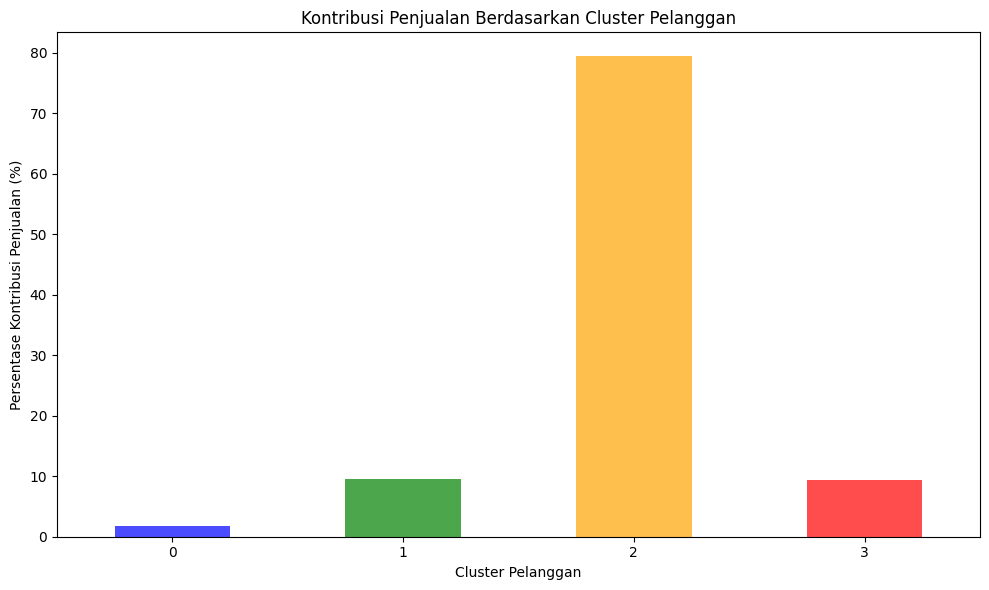

,Total Sales,Customer Count,Sales Contribution (%)
Cluster,,,
0,1124000,3,1.723821
1,6218000,3,9.536225
2,51778000,4,79.409239
3,6084000,7,9.330716


In [ ]:
# Menghitung kontribusi penjualan dari setiap cluster pelanggan RFM
rfm_profit_analysis = rfm_data.groupby('Cluster').agg({
    'Monetary': 'sum',
    'Nama': 'count'
}).rename(columns={'Monetary': 'Total Sales', 'Nama': 'Customer Count'})

# Menghitung persentase kontribusi penjualan setiap cluster
rfm_profit_analysis['Sales Contribution (%)'] = (rfm_profit_analysis['Total Sales'] / rfm_profit_analysis['Total Sales'].sum()) * 100

# Visualisasi kontribusi penjualan per cluster pelanggan
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
rfm_profit_analysis['Sales Contribution (%)'].plot(kind='bar', color=['blue', 'green', 'orange', 'red'], alpha=0.7)
plt.title('Kontribusi Penjualan Berdasarkan Cluster Pelanggan')
plt.xlabel('Cluster Pelanggan')
plt.ylabel('Persentase Kontribusi Penjualan (%)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

rfm_profit_analysis
